**Neural Network - Gas Turbines**

In [ ]:
import pandas as pd
import numpy as npd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
gas = pd.read_csv('gas_turbines.csv')
gas.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [ ]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [ ]:
gas.shape

(15039, 11)

In [ ]:
gas.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [ ]:
gas.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


**EDA & Feature Engineering**






In [ ]:
gas.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [ ]:
gas.isna().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

<Axes: >

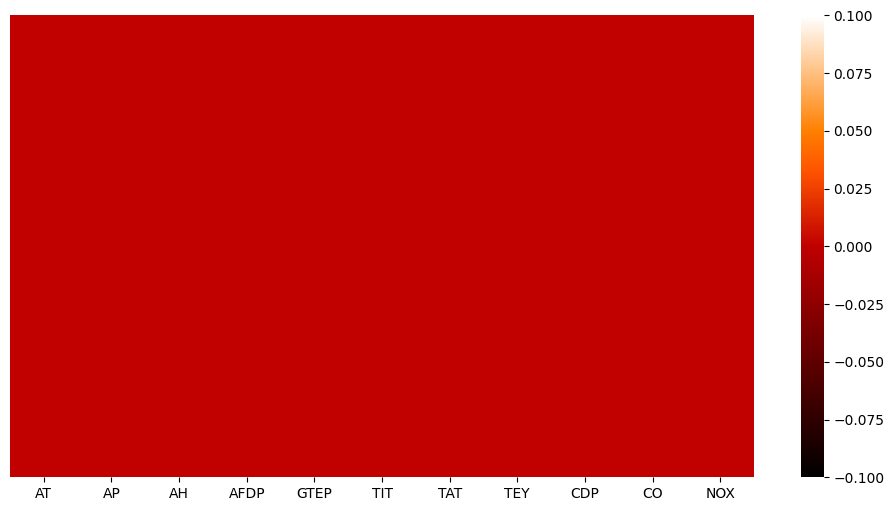

In [ ]:
plt.rcParams['figure.figsize']=(12,6)
sns.heatmap(gas.isna(), cmap =('gist_heat'), yticklabels=False)


In [ ]:
#check for duplicate values
gas[gas.duplicated()].shape


(0, 11)

In [ ]:
gas[gas.duplicated()]


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [ ]:
gas.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [ ]:
gas.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

**Observation:**

    There are No missing values
    There are No duplicate values
    All data types are correct.

# **Data Visualization**




<Axes: title={'center': 'Distplot for AT'}, xlabel='AT', ylabel='Density'>

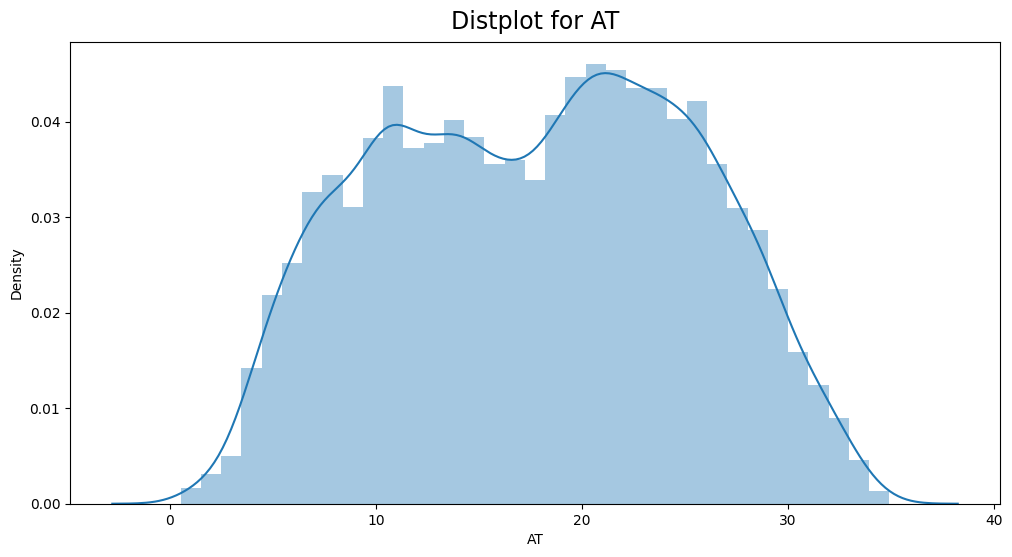

In [ ]:
plt.title('Distplot for AT', fontsize=17, y = 1.01)
sns.distplot(gas['AT'])

<Axes: title={'center': 'Distplot for AP'}, xlabel='AP', ylabel='Density'>

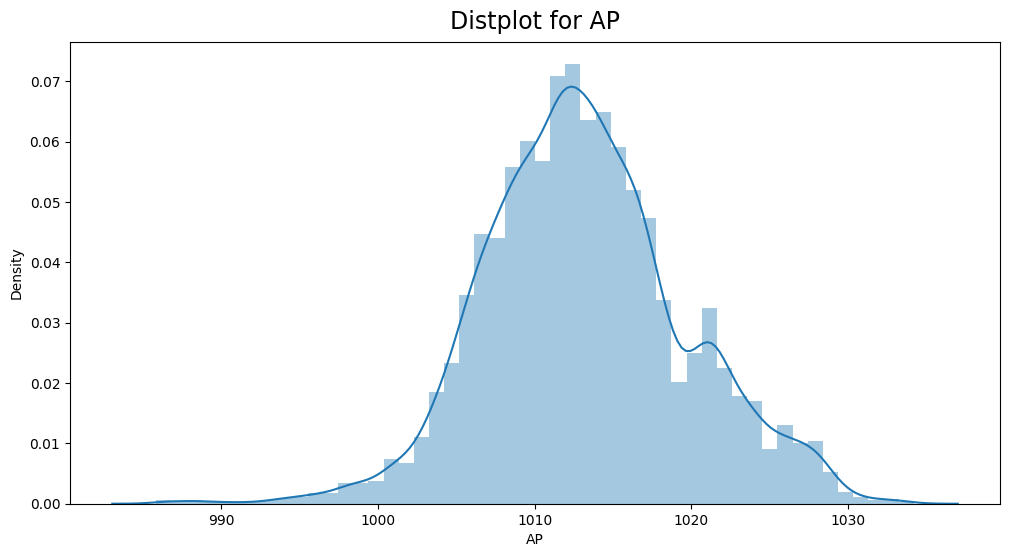

In [ ]:
plt.title('Distplot for AP', fontsize=17, y = 1.01)
sns.distplot(gas['AP'])

<Axes: title={'center': 'Distplot for AH'}, xlabel='AH', ylabel='Density'>

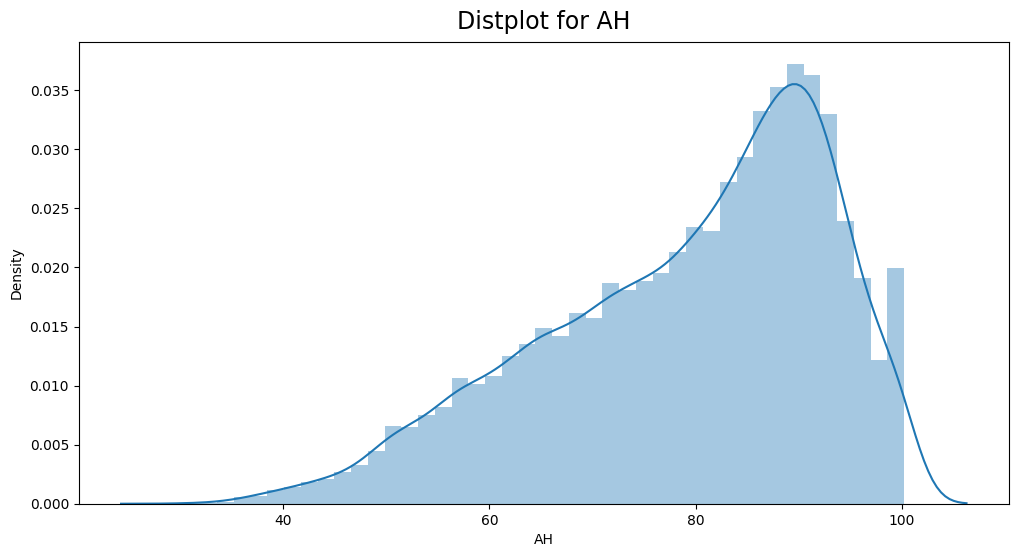

In [ ]:
plt.title('Distplot for AH', fontsize=17, y = 1.01)
sns.distplot(gas['AH'])

<Axes: title={'center': 'Distplot for AFDP'}, xlabel='AFDP', ylabel='Density'>

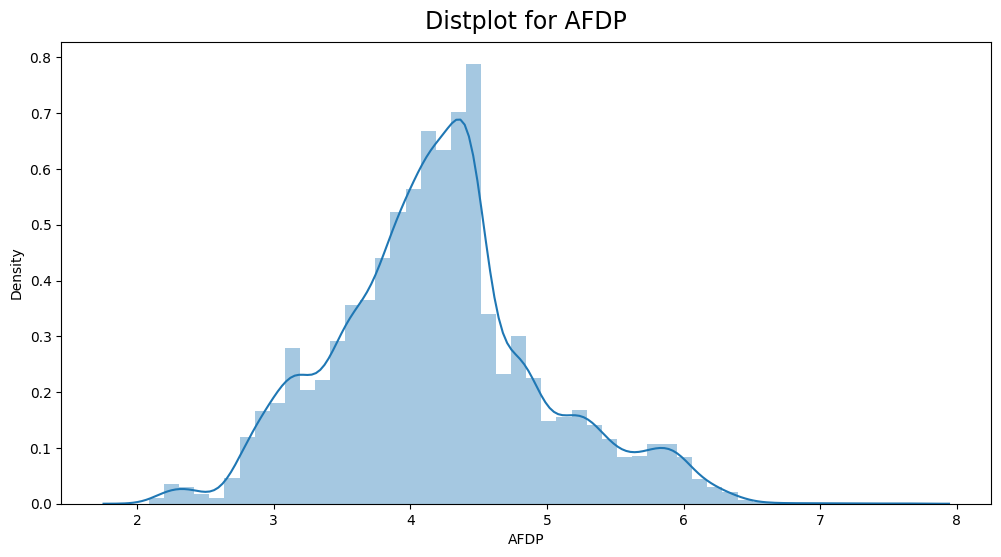

In [ ]:
plt.title('Distplot for AFDP', fontsize=17, y = 1.01)
sns.distplot(gas['AFDP'])

<Axes: title={'center': 'Distplot for TIT'}, xlabel='TIT', ylabel='Density'>

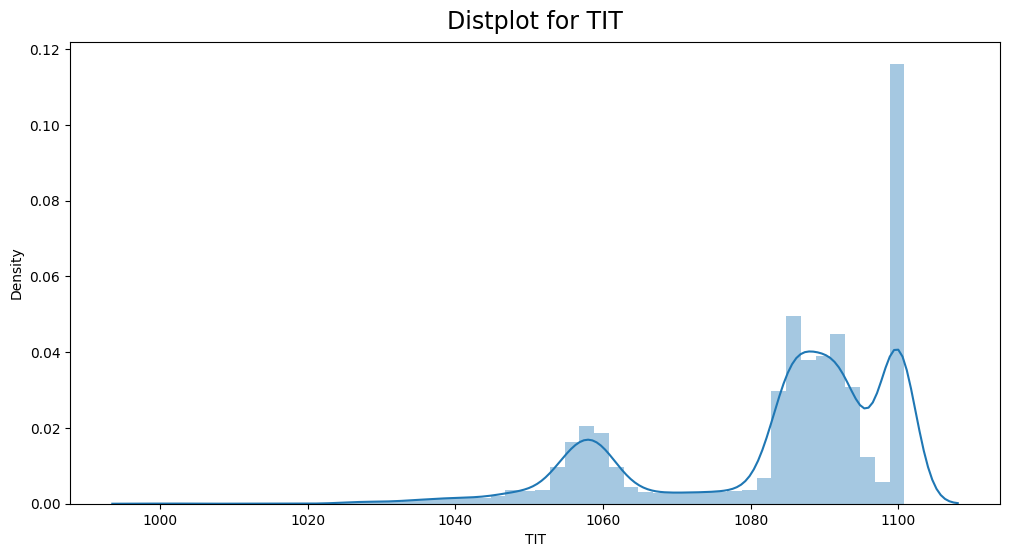

In [ ]:
plt.title('Distplot for TIT', fontsize=17, y = 1.01)
sns.distplot(gas['TIT'])

<Axes: title={'center': 'Distplot for TAT'}, xlabel='TAT', ylabel='Density'>

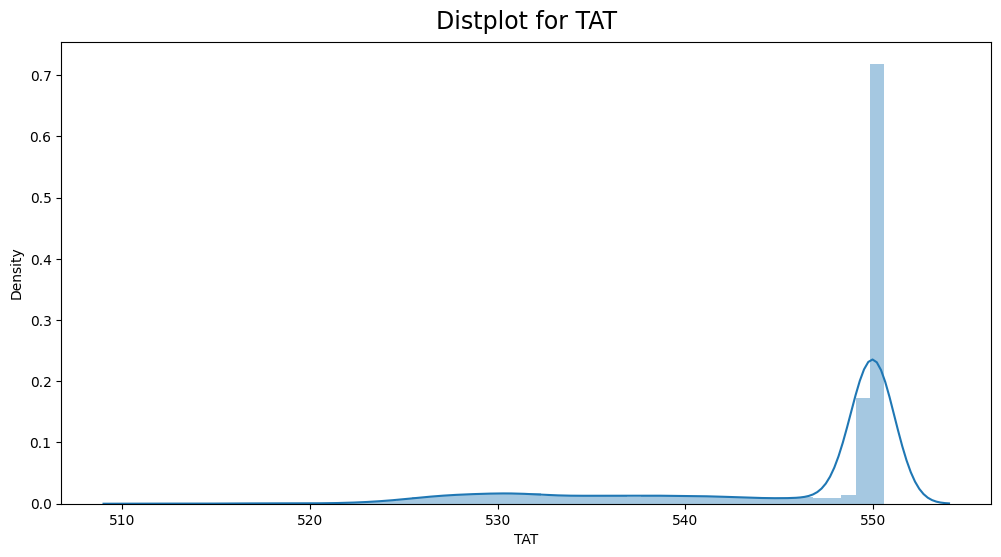

In [ ]:
plt.title('Distplot for TAT', fontsize=17, y = 1.01)
sns.distplot(gas['TAT'])

<Axes: title={'center': 'Distplot for TEY'}, xlabel='TEY', ylabel='Density'>

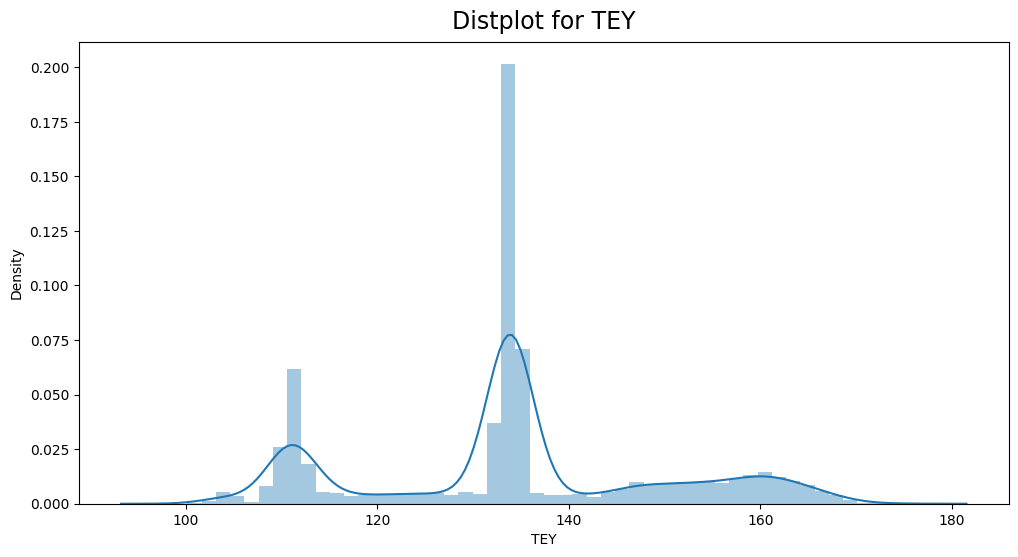

In [ ]:
#Target variable
plt.title('Distplot for TEY', fontsize=17, y = 1.01)
sns.distplot(gas['TEY'])


<Axes: title={'center': 'Distplot for GTEP'}, xlabel='GTEP', ylabel='Density'>

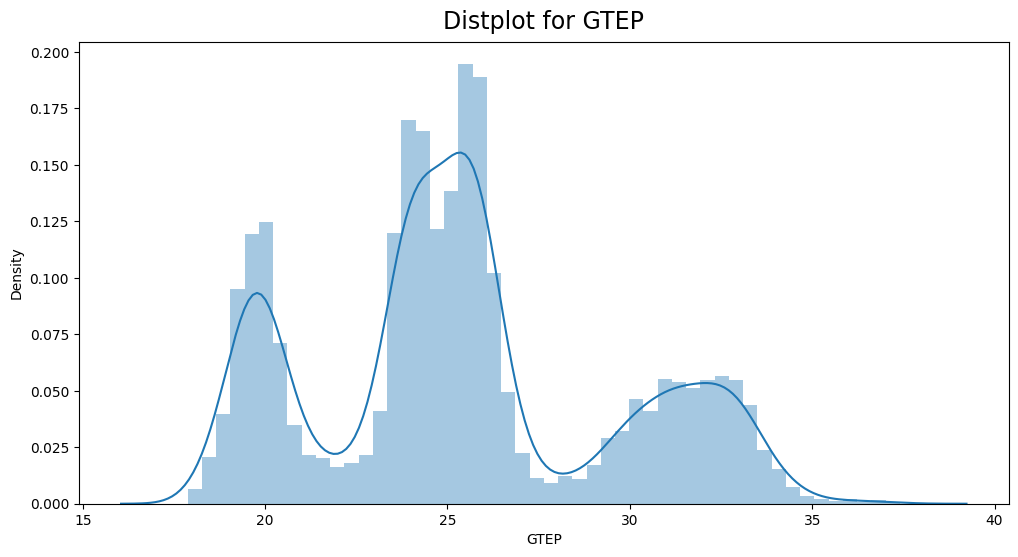

In [ ]:
plt.title('Distplot for GTEP', fontsize=17, y = 1.01)
sns.distplot(gas['GTEP'])

<Axes: title={'center': 'Distplot for CDP'}, xlabel='CDP', ylabel='Density'>

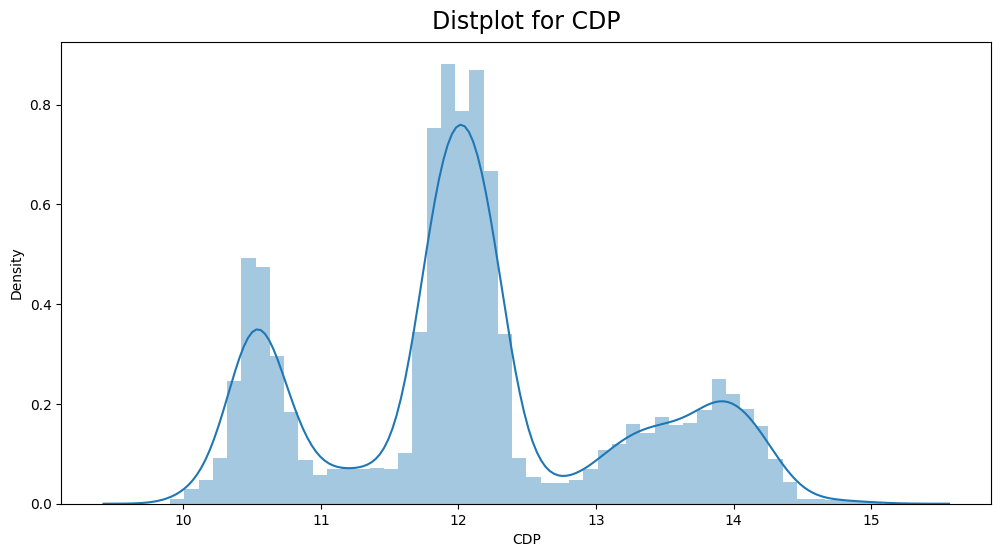

In [ ]:
plt.title('Distplot for CDP', fontsize=17, y = 1.01)
sns.distplot(gas['CDP'])

<Axes: title={'center': 'Distplot for CO'}, xlabel='CO', ylabel='Density'>

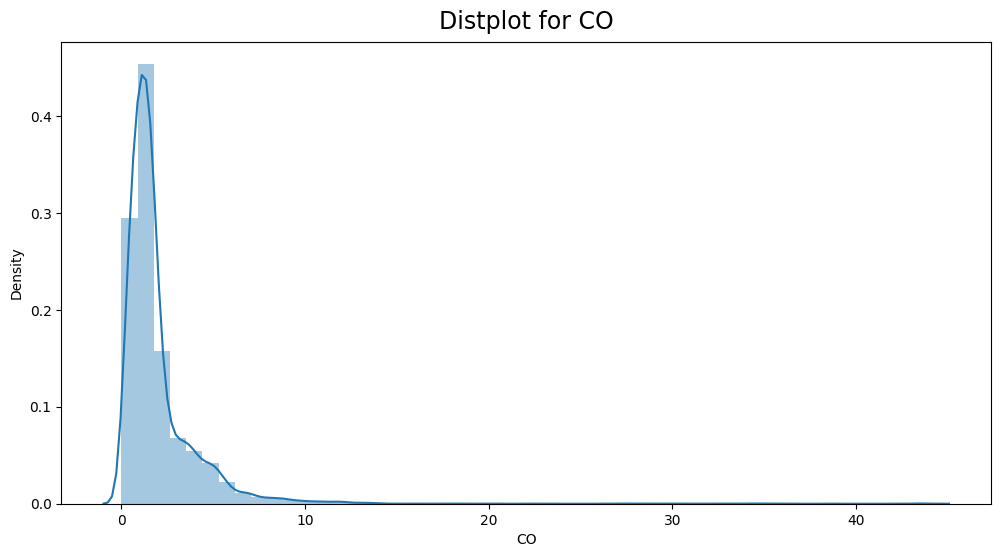

In [ ]:
plt.title('Distplot for CO', fontsize=17, y = 1.01)
sns.distplot(gas['CO'])

<Axes: title={'center': 'Distplot for NOX'}, xlabel='NOX', ylabel='Density'>

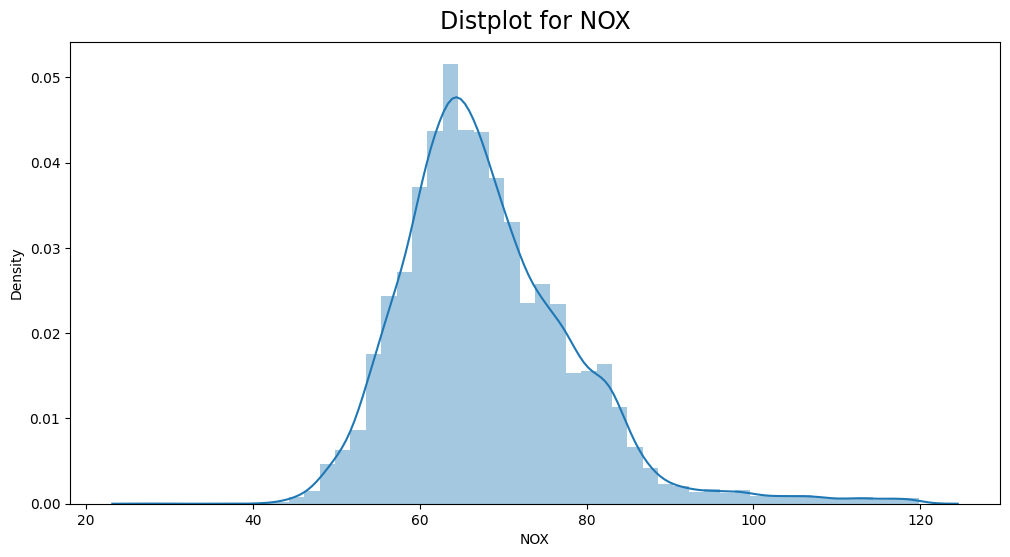

In [ ]:
plt.title('Distplot for NOX', fontsize=17, y = 1.01)
sns.distplot(gas['NOX'])

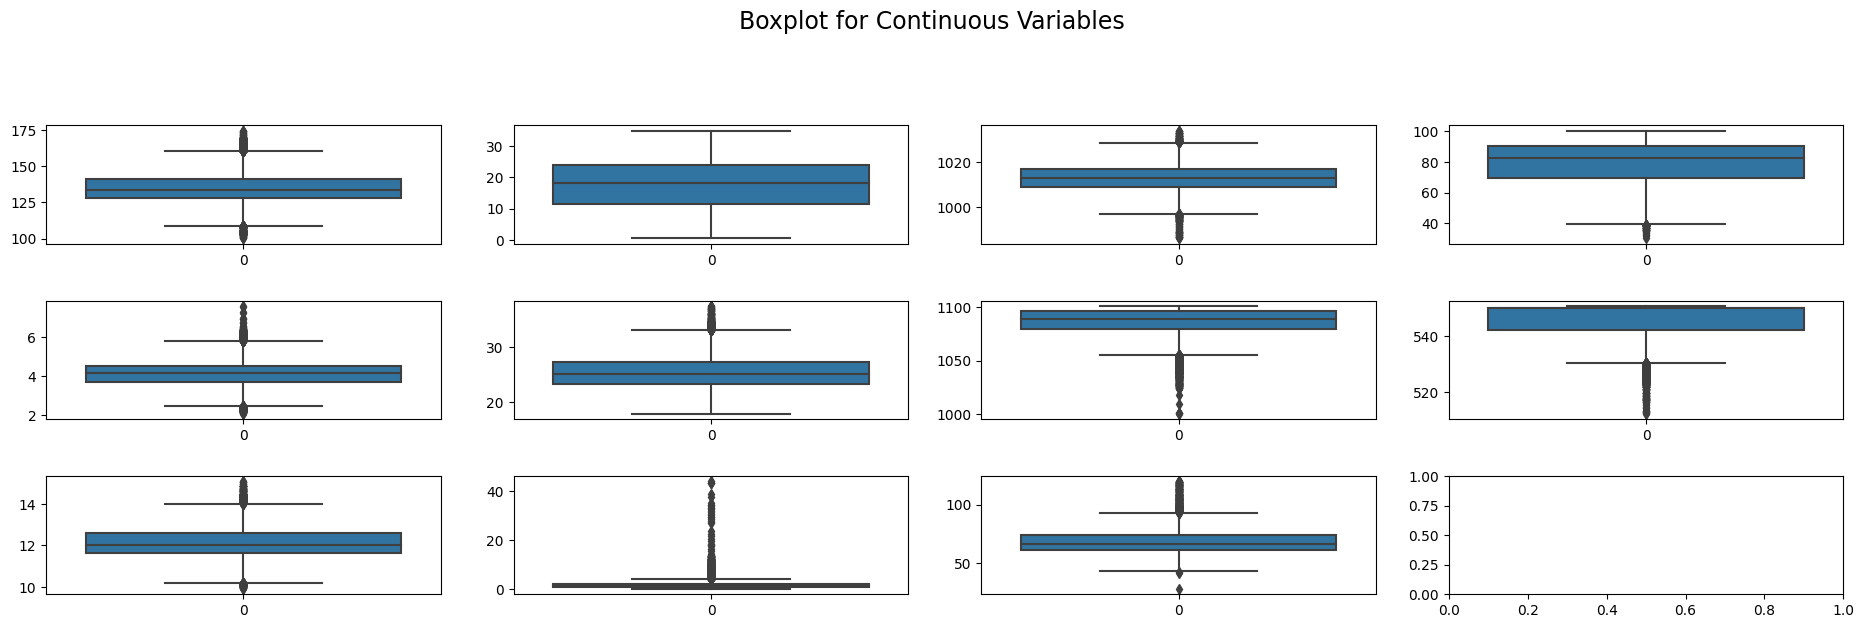

In [ ]:
#check for outliers
fig, ax=plt.subplots(3,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(gas.TEY, ax=ax[0,0])
sns.boxplot(gas.AT, ax=ax[0,1])
sns.boxplot(gas.AP, ax=ax[0,2])
sns.boxplot(gas.AH, ax=ax[0,3])
sns.boxplot(gas.AFDP, ax=ax[1,0])
sns.boxplot(gas.GTEP, ax=ax[1,1])
sns.boxplot(gas.TIT, ax=ax[1,2])
sns.boxplot(gas.TAT, ax=ax[1,3])
sns.boxplot(gas.CDP, ax=ax[2,0])
sns.boxplot(gas.CO, ax=ax[2,1])
sns.boxplot(gas.NOX, ax=ax[2,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)


**Observation : We have noisy data**

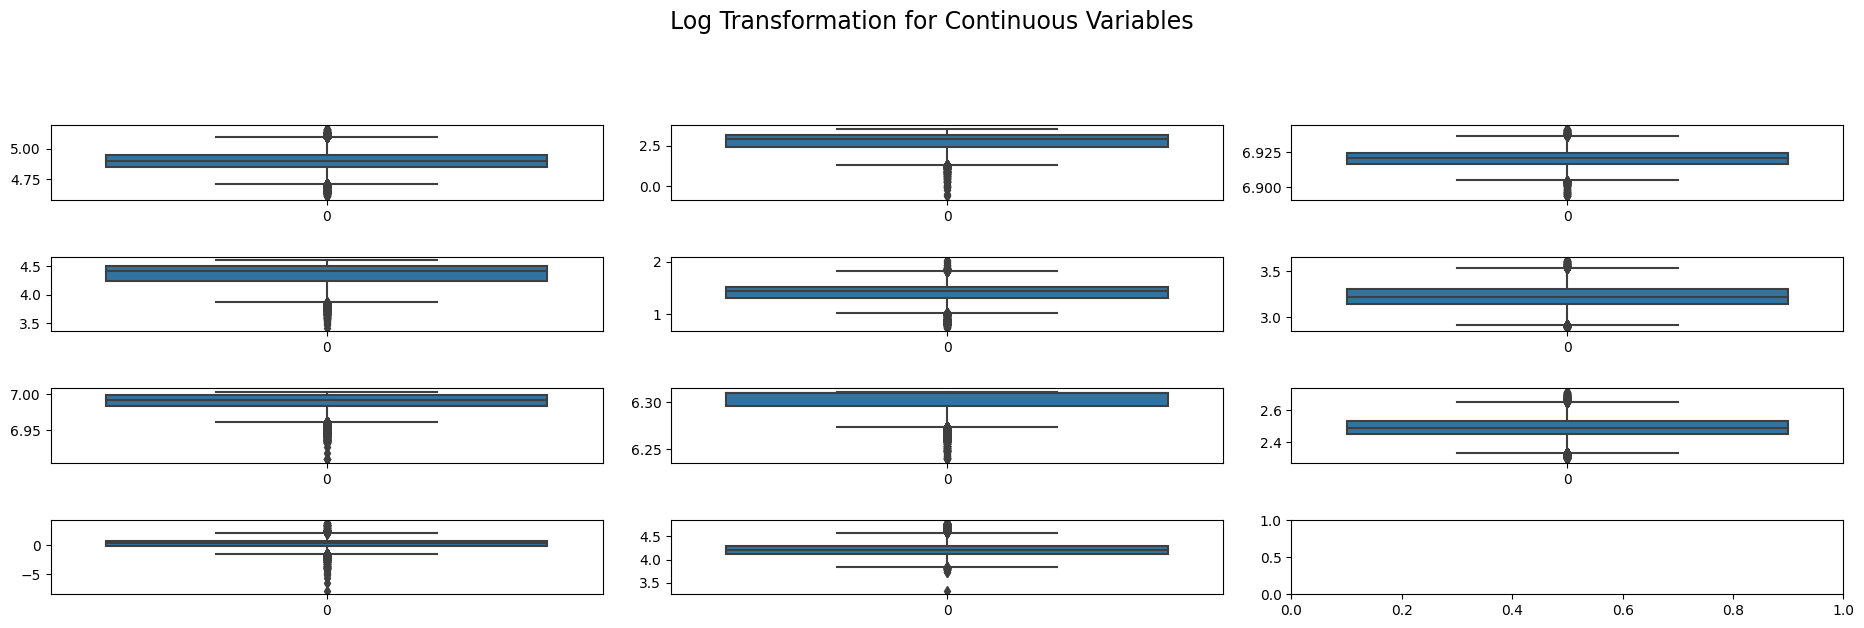

In [ ]:
import numpy as np
fig, ax=plt.subplots(4,3, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.log(gas.TEY), ax=ax[0,0])
sns.boxplot(np.log(gas.AT), ax=ax[0,1])
sns.boxplot(np.log(gas.AP), ax=ax[0,2])
sns.boxplot(np.log(gas.AH), ax=ax[1,0])
sns.boxplot(np.log(gas.AFDP), ax=ax[1,1])
sns.boxplot(np.log(gas.GTEP), ax=ax[1,2])
sns.boxplot(np.log(gas.TIT), ax=ax[2,0])
sns.boxplot(np.log(gas.TAT), ax=ax[2,1])
sns.boxplot(np.log(gas.CDP), ax=ax[2,2])
sns.boxplot(np.log(gas.CO), ax=ax[3,0])
sns.boxplot(np.log(gas.NOX), ax=ax[3,1])
plt.suptitle("Log Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

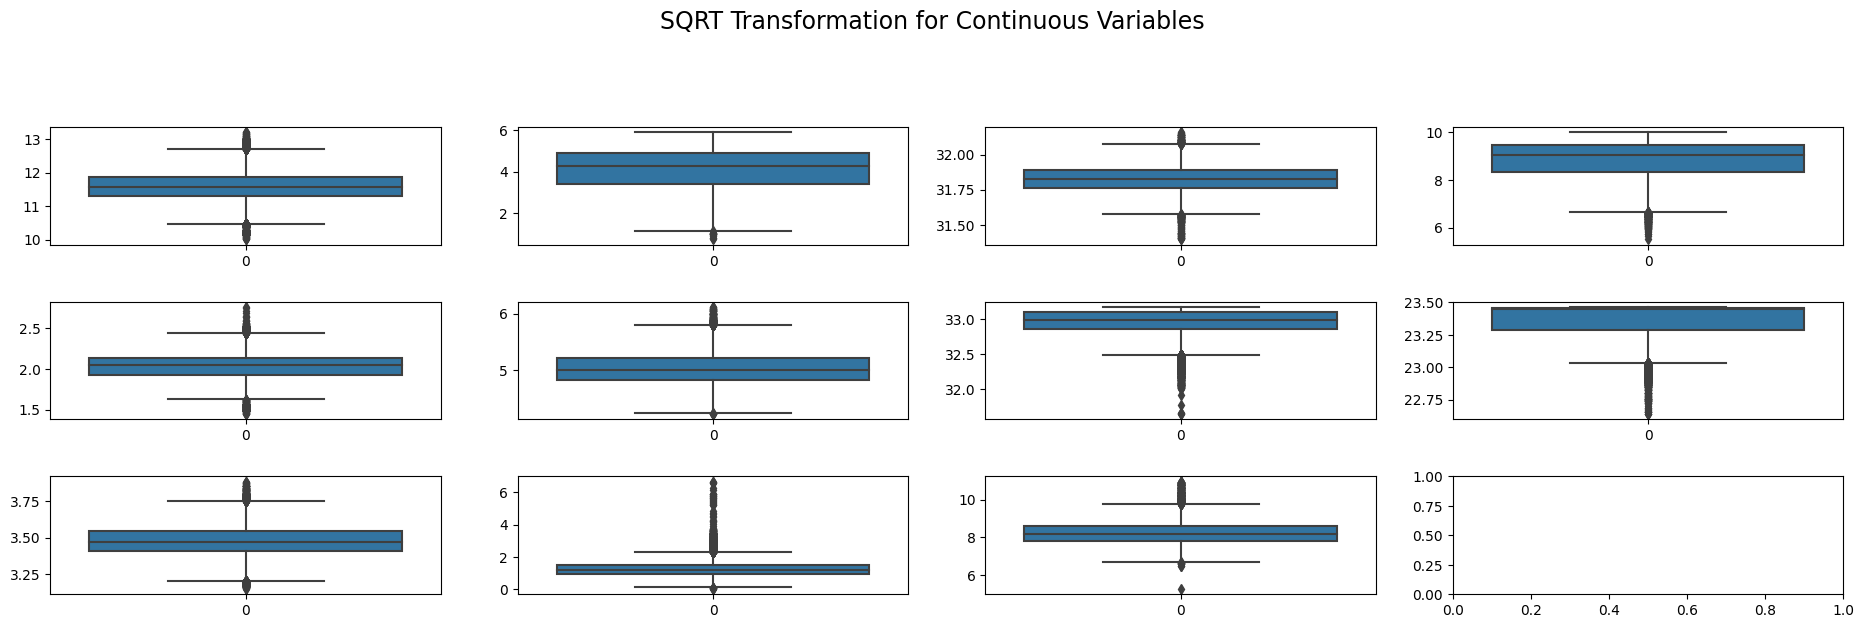

In [ ]:
fig, ax=plt.subplots(3,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.sqrt(gas.TEY), ax=ax[0,0])
sns.boxplot(np.sqrt(gas.AT), ax=ax[0,1])
sns.boxplot(np.sqrt(gas.AP), ax=ax[0,2])
sns.boxplot(np.sqrt(gas.AH), ax=ax[0,3])
sns.boxplot(np.sqrt(gas.AFDP), ax=ax[1,0])
sns.boxplot(np.sqrt(gas.GTEP), ax=ax[1,1])
sns.boxplot(np.sqrt(gas.TIT), ax=ax[1,2])
sns.boxplot(np.sqrt(gas.TAT), ax=ax[1,3])
sns.boxplot(np.sqrt(gas.CDP), ax=ax[2,0])
sns.boxplot(np.sqrt(gas.CO), ax=ax[2,1])
sns.boxplot(np.sqrt(gas.NOX), ax=ax[2,2])
plt.suptitle("SQRT Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)


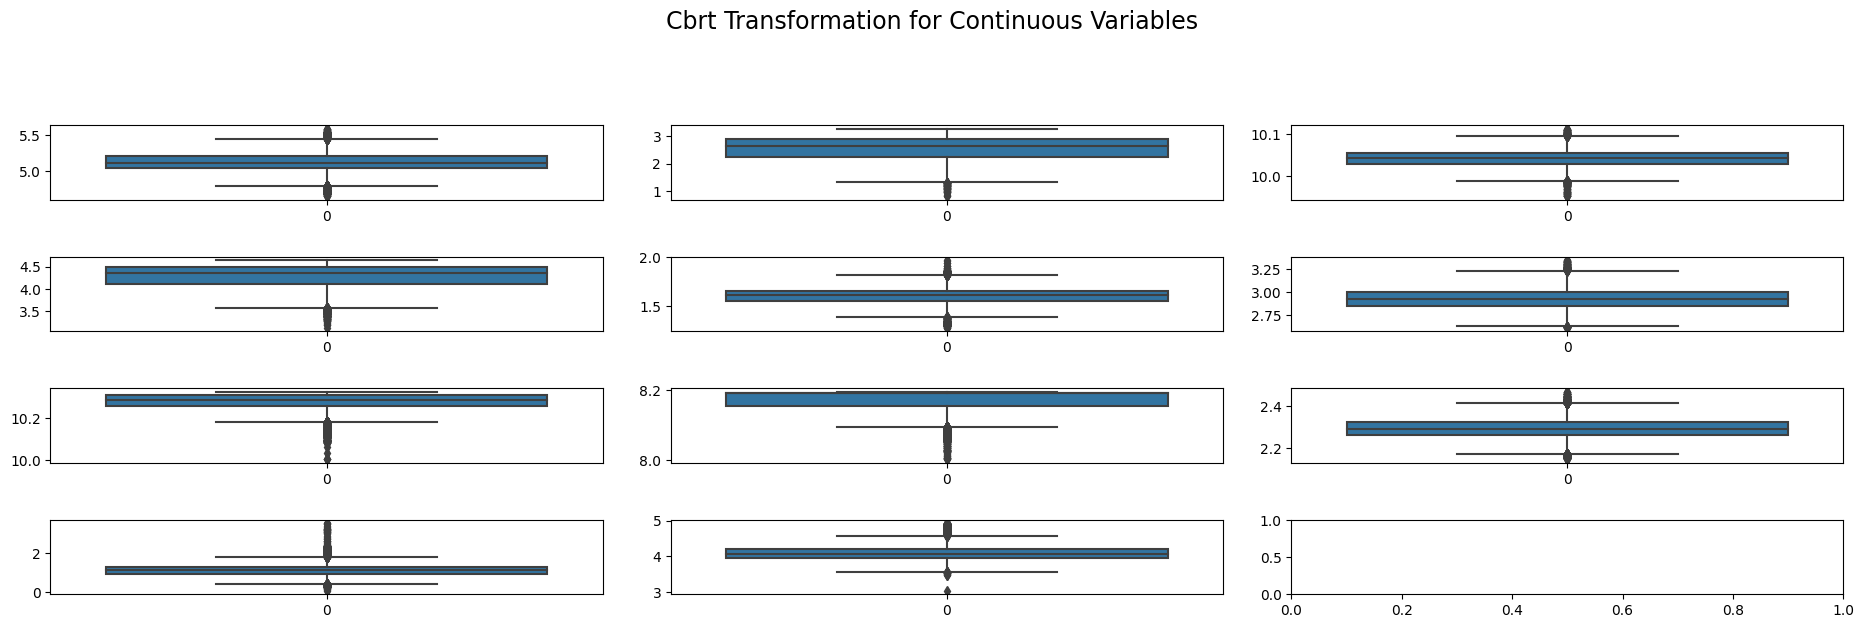

In [ ]:
fig, ax=plt.subplots(4,3, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.cbrt(gas.TEY), ax=ax[0,0])
sns.boxplot(np.cbrt(gas.AT), ax=ax[0,1])
sns.boxplot(np.cbrt(gas.AP), ax=ax[0,2])
sns.boxplot(np.cbrt(gas.AH), ax=ax[1,0])
sns.boxplot(np.cbrt(gas.AFDP), ax=ax[1,1])
sns.boxplot(np.cbrt(gas.GTEP), ax=ax[1,2])
sns.boxplot(np.cbrt(gas.TIT), ax=ax[2,0])
sns.boxplot(np.cbrt(gas.TAT), ax=ax[2,1])
sns.boxplot(np.cbrt(gas.CDP), ax=ax[2,2])
sns.boxplot(np.cbrt(gas.CO), ax=ax[3,0])
sns.boxplot(np.cbrt(gas.NOX), ax=ax[3,1])
plt.suptitle("Cbrt Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)


    None of the transformations are useful to find the outliers.



Dependency of Target variable on diff Features


In [ ]:
sns.pairplot(gas)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
corr = pd.DataFrame(data = gas.corr().iloc[:,7], index=gas.columns)
corr = corr.sort_values(by='TEY', ascending=False)
corr


,TEY
TEY,1.000000
CDP,0.988473
GTEP,0.977042
TIT,0.891587
AFDP,0.717995
AP,0.146939
NOX,-0.102631
AH,-0.110272
AT,-0.207495
CO,-0.541751


<Axes: title={'center': 'Correlation plot between Target variables and independent variables'}, ylabel='TEY'>

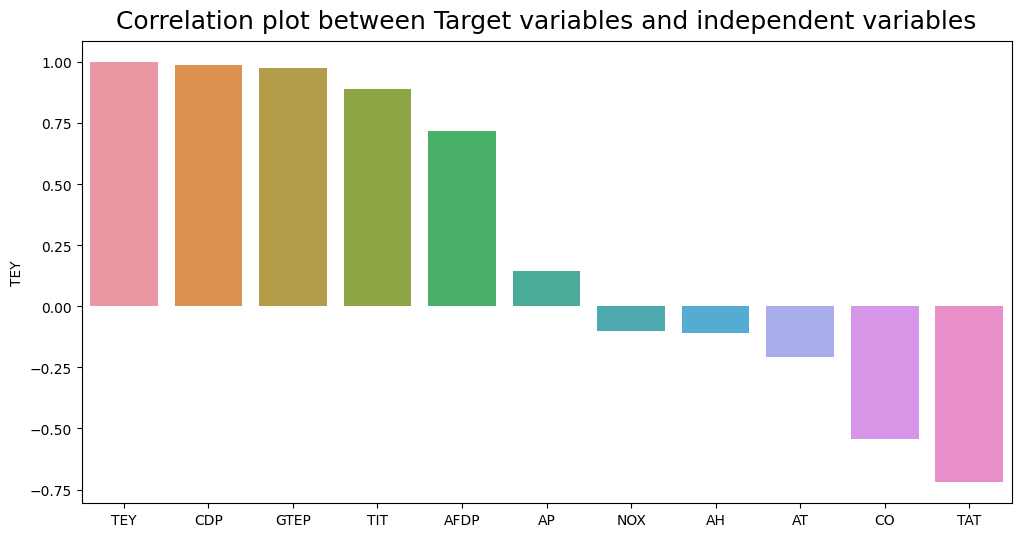

In [ ]:
plt.title("Correlation plot between Target variables and independent variables", y=1.01, fontsize=18)
sns.barplot(x = corr.index, y = corr.TEY)

Text(0.5, 1.0, 'Correlation Map of variables')

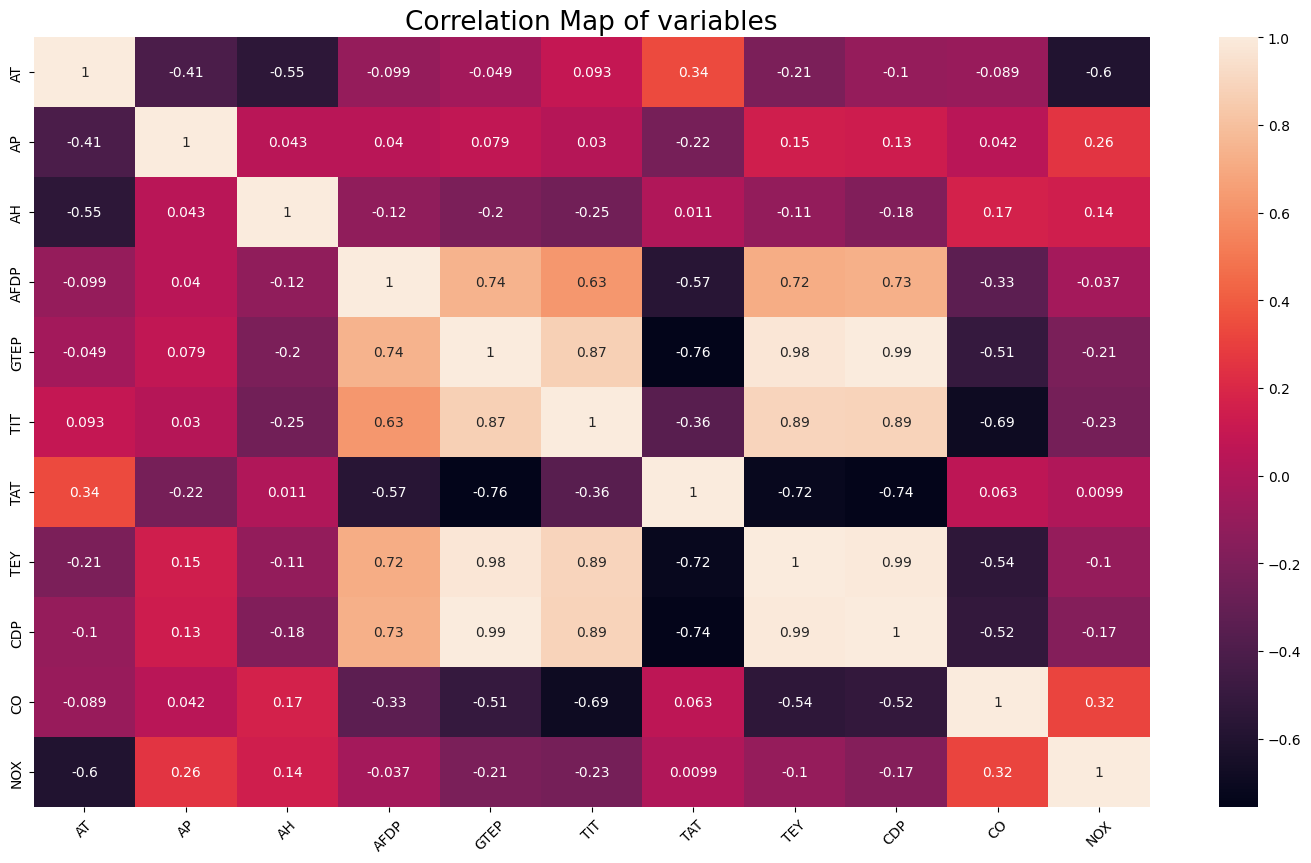

In [ ]:
fig= plt.figure(figsize=(18, 10))
sns.heatmap(gas.corr(), annot=True);
plt.xticks(rotation=45)
plt.title("Correlation Map of variables", fontsize=19)

In [ ]:
!pip install ppscore


  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=7972c088a2510f6aa983cfa164e35fde2da142aa4090c8b011a126819ebba1d6
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


In [ ]:
import ppscore as PPS
score = PPS.matrix(gas)
score_s = score[score['y']=='TEY']
score_s.sort_values(by="ppscore", ascending=False)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
84,TEY,TEY,1.000000,predict_itself,True,None,0.000000,1.000000,None
95,CDP,TEY,0.872285,regression,True,mean absolute error,11.172076,1.426840,DecisionTreeRegressor()
51,GTEP,TEY,0.832336,regression,True,mean absolute error,11.172076,1.873154,DecisionTreeRegressor()
62,TIT,TEY,0.766040,regression,True,mean absolute error,11.172076,2.613821,DecisionTreeRegressor()
73,TAT,TEY,0.226050,regression,True,mean absolute error,11.172076,8.646631,DecisionTreeRegressor()
40,AFDP,TEY,0.152509,regression,True,mean absolute error,11.172076,9.468234,DecisionTreeRegressor()
106,CO,TEY,0.055869,regression,True,mean absolute error,11.172076,10.547906,DecisionTreeRegressor()
7,AT,TEY,0.000000,regression,True,mean absolute error,11.172076,16.007470,DecisionTreeRegressor()
18,AP,TEY,0.000000,regression,True,mean absolute error,11.172076,12.475617,DecisionTreeRegressor()
29,AH,TEY,0.000000,regression,True,mean absolute error,11.172076,16.950976,DecisionTreeRegressor()


Text(0.5, 1.01, 'PPScore of each feature with Target variable')

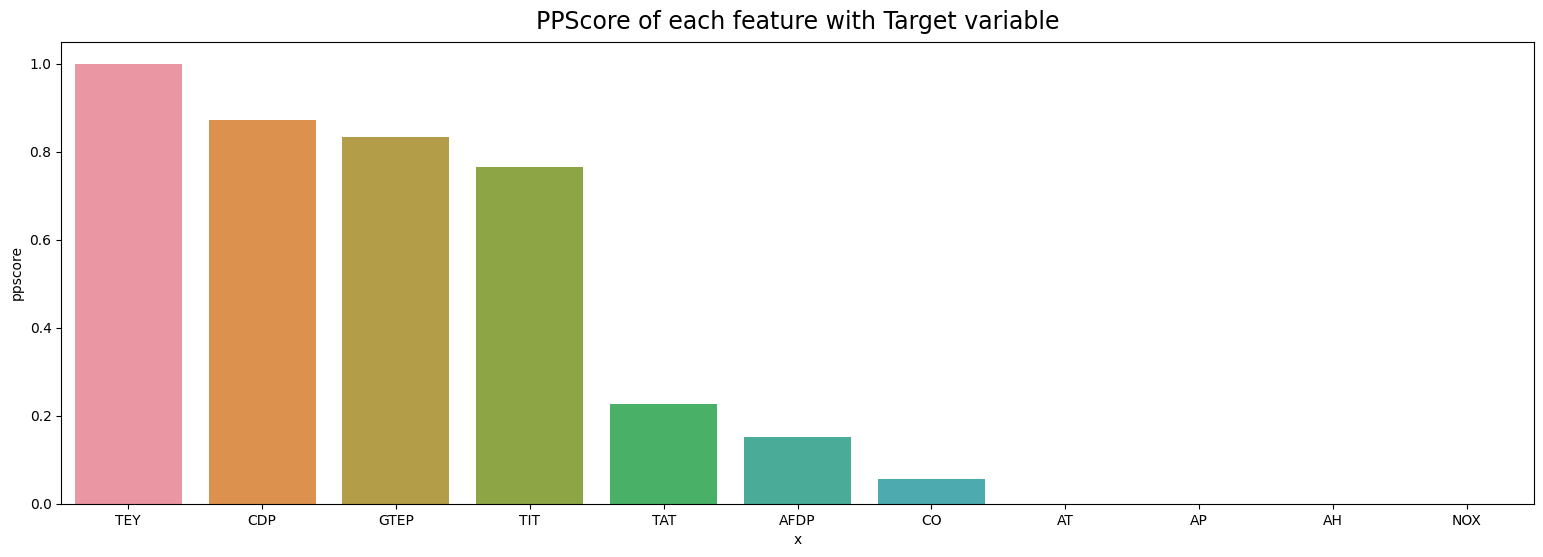

In [ ]:
plt.rcParams['figure.figsize']=(19,6)
sns.barplot(x='x', y='ppscore', data=score_s.sort_values(by='ppscore', ascending=False))
plt.title("PPScore of each feature with Target variable", fontsize=17, y=1.01)


Observation:

    From correlation matrix as well as ppscore we can clearly see that TEY is highly dependent on 'CDP', 'GTEP', 'TIT'.
    We can drop 'AT', 'AP', 'AH', 'NOX' as they have very less impact on dependent variables.





Check for outliers


In [ ]:
#check for outliers
from sklearn.ensemble import IsolationForest
data1=gas.copy()

#training the model
clf = IsolationForest(random_state=10, contamination=.001)
clf.fit(data1)
data1['anamoly'] = clf.predict(data1.iloc[:,0:11])
outliers = data1[data1['anamoly']==-1]

In [ ]:
outliers

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,anamoly
261,5.66020,1018.30,86.968,3.8404,21.079,1028.5,523.86,112.02,10.963,43.4280,99.237,-1
553,3.55320,1027.30,90.871,4.2162,21.464,1041.2,531.68,117.76,10.984,8.8254,106.840,-1
763,1.81300,1007.20,74.980,3.6967,19.958,1026.4,528.18,111.72,10.553,12.0900,114.940,-1
764,1.49880,1006.30,76.734,3.7063,20.041,1027.6,528.79,112.28,10.585,11.6520,112.830,-1
765,0.97877,1005.70,78.978,3.7379,20.084,1027.9,528.52,112.71,10.628,11.6910,108.880,-1
993,4.36570,1021.60,85.528,3.9574,20.263,1025.6,525.72,111.35,10.652,12.7860,112.270,-1
6896,17.13200,1010.80,80.503,2.2148,18.484,1034.1,539.98,102.07,10.182,11.5150,110.760,-1
7019,7.02760,997.23,97.761,2.0992,19.227,1037.2,538.53,109.63,10.338,11.0440,105.060,-1
7470,7.04730,1019.60,96.885,2.4558,19.501,1032.0,532.32,109.21,10.567,11.3740,112.230,-1
9920,15.17900,1017.60,71.630,2.7816,18.435,1027.8,533.45,103.64,10.143,12.1440,113.800,-1


    These are the outliers in our data.



**Data Preprocessing**

In [ ]:
gas.shape

(15039, 11)

In [ ]:
#drop the outliers
gas = gas.drop(outliers.index)
gas.shape


(15023, 11)

In [ ]:
#reset index after dropping outliers
gas = gas.reset_index()
gas = gas.drop('index', axis = 1)
gas


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15018,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15019,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15020,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15021,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [ ]:
gas = gas.drop(['AT', 'AP', 'AH', 'NOX'], axis=1)


In [ ]:
gas.shape

(15023, 7)

**Converting independent features into normalised and standardized data**

In [ ]:
#Standardize & Normalize the data
norm = MinMaxScaler()
std = StandardScaler()

gas_norm = pd.DataFrame(norm.fit_transform(gas), columns=gas.columns)            #data between -3 to +3
gas_std = pd.DataFrame(std.fit_transform(gas), columns=gas.columns)            #data between -1 to +1

**Take a smaller sample to build a model**

In [ ]:
temp = gas_std.sample(frac=1)          #shuffle all the data
temp_s = gas_std.sample(frac=0.1)

In [ ]:
temp_s

,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
8380,1.332338,1.759917,0.976474,-2.212578,1.811859,1.696069,-0.764716
10582,-0.669639,-0.164247,0.282472,0.618699,-0.018060,-0.004551,-0.365338
8102,1.075543,1.779094,0.976474,-2.215127,1.839681,1.753210,0.102153
8725,1.088837,1.195876,0.745140,-1.417476,1.298419,1.215361,-0.236010
13826,-0.441142,-0.312389,0.148542,0.571554,-0.056631,-0.187764,-0.020883
...,...,...,...,...,...,...,...
12909,-1.384085,-1.272194,-1.489061,0.579199,-1.445195,-1.316069,0.099403
7155,-0.447592,1.938502,0.970387,-2.193465,1.815653,1.769536,-0.553387
5379,-0.096555,-0.119421,0.312911,0.607231,-0.023119,-0.094343,0.180728
11904,0.227763,0.443421,0.136366,-0.433792,0.119152,0.264828,-0.512608


**Splitting data into target variable and independent variables**


In [ ]:
x = temp_s.drop('TEY', axis=1)
y = temp_s['TEY']
x


,AFDP,GTEP,TIT,TAT,CDP,CO
8380,1.332338,1.759917,0.976474,-2.212578,1.696069,-0.764716
10582,-0.669639,-0.164247,0.282472,0.618699,-0.004551,-0.365338
8102,1.075543,1.779094,0.976474,-2.215127,1.753210,0.102153
8725,1.088837,1.195876,0.745140,-1.417476,1.215361,-0.236010
13826,-0.441142,-0.312389,0.148542,0.571554,-0.187764,-0.020883
...,...,...,...,...,...,...
12909,-1.384085,-1.272194,-1.489061,0.579199,-1.316069,0.099403
7155,-0.447592,1.938502,0.970387,-2.193465,1.769536,-0.553387
5379,-0.096555,-0.119421,0.312911,0.607231,-0.094343,0.180728
11904,0.227763,0.443421,0.136366,-0.433792,0.264828,-0.512608


**Creating train and test data for model validation**


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1126, 6), (376, 6), (1126,), (376,))

Build a Model

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install keras==2.12.0

In [ ]:
# Importing the necessary packages
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
from keras.layers import Dropout
tf.config.experimental.list_physical_devices('GPU')

[]

In [ ]:
#Model with 2 hidden layer
def create_model_two_hidden_layers():
    model = Sequential()
    model.add(Dense(5, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))

    adam=Adam(lr=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [ ]:
model1 = create_model_two_hidden_layers()
print("Here is the summary of the model:")
model1.summary()


Here is the summary of the model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 35        
                                                                 
 dense_1 (Dense)             (None, 6)                 36        
                                                                 
 dense_2 (Dense)             (None, 10)                70        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Model with 3 hidden layer
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(32, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))

    adam=Adam(lr=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [ ]:
model2 = create_model_three_hidden_layers()
print("Here is the summary of the model2:")
model2.summary()

Here is the summary of the model2:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11,841
Trainable params: 11,841
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
epochs=500
batch_size=50

print("Here is the summary of this model:")
model2.summary()

with tf.device('GPU:0'):
  model2.fit(x_train,y_train, verbose = 0,batch_size = batch_size,epochs = epochs, shuffle=True)

Here is the summary of this model:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11,841
Trainable params: 11,841
Non-trainable params: 0
_________________________________________________________________


NameError: ignored